Trying to model Ocean surface waves, I have played using a [linear superposition of sinusoids](https://laurentperrinet.github.io/sciblog/posts/2014-10-24_a-bit-of-fun-with-gravity-waves.html) and also on the fact that [phase speed (following a wave's crest) is twice as fast as group speed (following a group of waves)](https://laurentperrinet.github.io/sciblog/posts/2016-04-24_a-wave-going-backwards.html). Finally, I more recently used such generation of a model of the random superposition of waves to model the [wigggling lines formed by the refraction (bendings of the trajectory of a ray at the interface between air and water) of light, called caustics](https://laurentperrinet.github.io/sciblog/posts/2020-06-19-caustic-optics.html)...

Observing real-life ocean waves instructed me that if a single wave is well approximated by a sinusoïd, each wave is qualitatively a bit different. Typical for these surface gravity waves are [the sharp crests and flat troughs](https://en.wikipedia.org/wiki/Stokes_wave). As a matter of fact, modelling ocean waves is on one side very useful ([Ocean dynamics](https://en.wikipedia.org/wiki/Ocean_dynamics) and its impact on climate, modelling tides, tsunamis, diffraction in a bay to predict coastline evolution, ...) but quite demanding despite a [well known mathematical model](https://en.wikipedia.org/wiki/Airy_wave_theory). Starting with the Navier-Stokes equations to an incompressible fluid (water) in a gravitational field leads to [Luke's variational principle](https://en.wikipedia.org/wiki/Luke%27s_variational_principle) in certain simplifying conditions. Further simplifications lead to the approximate solution given by Stokes which gives the following shape as the sum of different harmonics:

![Stokes wave(https://en.wikipedia.org/wiki/Stokes_wave)](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Stokes3_wave.svg/2880px-Stokes3_wave.svg.png)

This seems well enough at the moment and I will capture this shape in this notebook and notably if that applies to a random mixture of such waves...

(WORK IN PROGRESS)

<!-- TEASER_END -->

Let's first initialize the notebook:

In [1]:
from __future__ import division, print_function
import numpy as np
np.set_printoptions(precision=6, suppress=True)
import os
%matplotlib inline
#%config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
phi = (np.sqrt(5)+1)/2
fig_width = 10
figsize = (fig_width, fig_width/phi)
from IPython.display import display, HTML
def show_video(filename): 
    return HTML(data='<video src="{}" loop autoplay width="600" height="600"></video>'.format(filename))
%load_ext autoreload
%autoreload 2

## From a sinusoid to a Stoke wave

From the equation given for [third-order Stokes wave on deep water](https://en.wikipedia.org/wiki/Stokes_wave#Third-order_Stokes_wave_on_deep_water), we can write the following function:

In [2]:
def stokes(pos, a=.3/2/np.pi, k=2*np.pi):
    # k*a is a dimensionless expansion parameter
    elevation = (1-1/16*(k*a)**2) * np.cos(k*pos)
    elevation += 1/2*(k*a)**1 * np.cos(2*k*pos)
    elevation += 3/8*(k*a)**2 * np.cos(3*k*pos)
    return a * elevation

Let's define the position along one period and one sample wave with  wave steepness $k \cdot a = 0.3$:

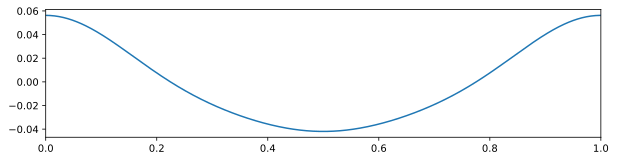

In [3]:
N_pos = 501
pos = np.linspace(0, 1, N_pos, endpoint=True)    
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**3))
ax.plot(pos, stokes(pos))
ax.set_xlim(np.min(pos), np.max(pos));

We can observe the effect of wave height from sinusoid (small $a$) to a Stokes wave (higher $a$):

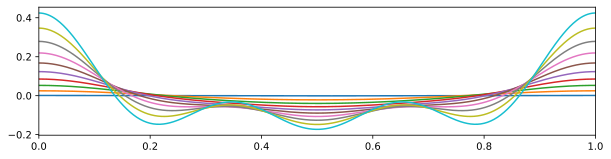

In [4]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**3))
for a in np.linspace(.001, .2, 10, endpoint=True):
    elevation = stokes(pos, a=a)
    ax.plot(pos, elevation)
    ax.set_xlim(np.min(pos), np.max(pos));

Normalized, we get:

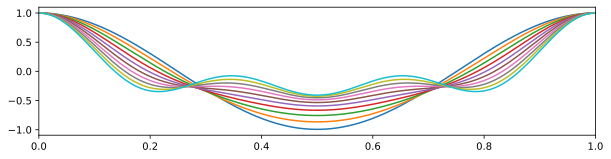

In [5]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**3))
for a in np.linspace(.001, .2, 10, endpoint=True):
    elevation = stokes(pos, a=a)
    ax.plot(pos, elevation/np.max(np.abs(elevation)))
    ax.set_xlim(np.min(pos), np.max(pos));

Which looks nice but also shows that the approximation is [not valid for higher amplitudes](https://en.wikipedia.org/wiki/Stokes_wave#Highest_wave):

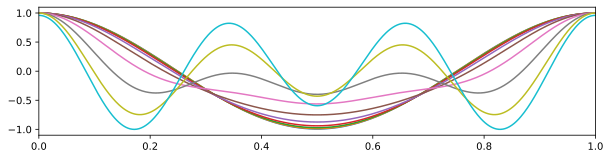

In [6]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**3))
for a in np.logspace(-3, 0, 10, base=10, endpoint=True):
    elevation = stokes(pos, a=a)
    ax.plot(pos, elevation/np.max(np.abs(elevation)))
    ax.set_xlim(np.min(pos), np.max(pos));

## Fifth order Fenton wave

Following the [5th order soltuion](http://johndfenton.com/Papers/Fenton85d-A-fifth-order-Stokes-theory-for-steady-waves.pdf), we can write the following function with expansion parameter $\epsilon = k\cdot H  / 2$ (Eq. 18):

In [7]:
def fenton(pos, H=.141*2/2/np.pi, k=2*np.pi):
    eps = k * H / 2 # dimensionless expansion parameter
    elevation = eps * np.cos(k*pos)
    elevation += 1/2 * eps**2 * np.cos(2*k*pos)
    elevation += 3/8 * eps**3 * (np.cos(3*k*pos)-np.cos(k*pos))
    elevation += 1/3 * eps**4 * (np.cos(2*k*pos)+np.cos(4*k*pos))
    elevation += 1/384 * eps**5 * (-422*np.cos(k*pos) + 297 * np.cos(3*k*pos)+125*np.cos(5*k*pos))
    return elevation / k

Note that if we keep the three first orders, this can also be written with $H = 2  \cdot a \cdot ( 1 + \frac 3 8 \cdot k^2 \cdot  a^2 )$ and thus  $\epsilon = ( k\cdot a ) \cdot ( 1 + \frac 3 8 \cdot (k \cdot  a)^2 )$:

In [8]:
def fenton_approx_1(pos, a, k):
    elevation = ((k*a) + 3 / 8 * (k*a)**3) * np.cos(k*pos)
    elevation += 1/2 * ((k*a) + 3 / 8 * (k*a)**3)**2 * np.cos(2*k*pos)
    elevation += 3/8 * ((k*a) + 3 / 8 * (k*a)**3)**3 * (np.cos(3*k*pos)-np.cos(k*pos))
    return elevation / k

keeping only terms with orders less than $3$, we obtain :

In [9]:
def fenton_approx_2(pos, a, k):
    elevation = (k*a) * np.cos(k*pos)
    elevation += 1/2 * (k*a)**2 * np.cos(2*k*pos)
    elevation += 3/8 * (k*a)**3 * (np.cos(3*k*pos)-np.cos(k*pos)) + 3 / 8 * (k*a)**3 * np.cos(k*pos)
    return elevation / k

By the way, this is consistant with the third order Stokes approximation defined above as:

In [10]:
def stokes(pos, a, k):
    elevation = (1-1/16*(k*a)**2) * np.cos(k*pos)
    elevation += 1/2*(k*a) * np.cos(2*k*pos)
    elevation += 3/8*(k*a)**2 * np.cos(3*k*pos)
    return a * elevation

Let's define the position along one period and one sample wave with  wave steepness $\epsilon = 0.141$:

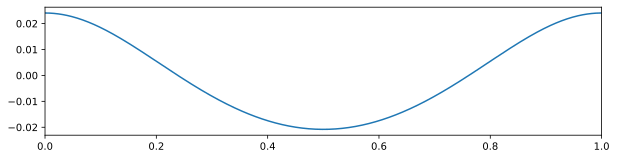

In [11]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**3))
ax.plot(pos, fenton(pos))
ax.set_xlim(np.min(pos), np.max(pos));

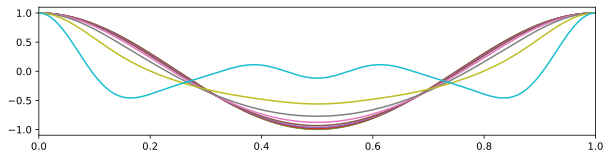

In [12]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**3))
for H in np.logspace(-3, -.58, 10, base=10, endpoint=True):
    elevation = fenton(pos, H=H)
    ax.plot(pos, elevation/np.max(np.abs(elevation)))
    ax.set_xlim(np.min(pos), np.max(pos));

## some book keeping for the notebook

In [13]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,matplotlib,scipy,pillow,imageio  -r -g -b

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.27.0

numpy     : 1.20.3
matplotlib: 3.3.3
scipy     : 1.6.0
pillow    : not installed
imageio   : 2.9.0

Compiler    : Clang 12.0.5 (clang-1205.0.22.9)
OS          : Darwin
Release     : 20.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: ekla

Git hash: 4fed71efac2f8cc7ab2f0575201b99f63d3233c0

Git repo: https://github.com/laurentperrinet/sciblog.git

Git branch: master

